<a href="https://colab.research.google.com/github/Praxis-QR/FDS/blob/main/FinTech_2_Basic_Technical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![CC-BY-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png)<br>
<hr>

![alt text](https://github.com/Praxis-QR/RDWH/raw/main/images/YantraJaalBanner.png)<br>


<hr>

[Prithwis Mukerjee](http://www.linkedin.com/in/prithwis)<br>

In [1]:
from datetime import datetime
import pytz
print('Tested on ',datetime.now(pytz.timezone('Asia/Calcutta')))
!python --version
!lsb_release -a

Tested on  2025-10-28 07:15:19.426799+05:30
Python 3.12.12
No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.4 LTS
Release:	22.04
Codename:	jammy


#Getting Historical Stock Market Data / BSE <br>
What is a stock? Why is it important? [Read here](https://docs.google.com/presentation/d/1eRLBw2ATwJSa8qFu0YUUNIayAL2Mogm-Q6LljTHM4S4/edit?usp=sharing) <br>
NSE Data is available here #NSE Data is available at https://www.nseindia.com/products/content/equities/equities/eq_security.htm <br> For symbols like BHARTIARTL, LT, HULV, HDFC etc <br>

or BSE Site BSE Historical Data is available at https://www.bseindia.com/markets/equity/EQReports/StockPrcHistori.html?flag=0 <br>

![alt text](https://github.com/Praxis-QR/FDS/raw/main/images/BSEHistoricData.png)<br>


Index data is available here https://www1.nseindia.com/products/content/equities/indices/historical_index_data.htm <br>
BSE Historical Data is available at https://www.bseindia.com/markets/equity/EQReports/StockPrcHistori.html?flag=0




##Load BSE Data in CSV format

In [2]:
import pandas as pd
pd.to_datetime('today').strftime('%d %B %Y')

'28 October 2025'

In [3]:
dfchk = pd.read_csv('/content/532454-AIRTEL-BSE-1Y.csv', delimiter =',')
dfchk.head(3)

Date  Open Price  High Price  Low Price  Close Price  \
0  27-October-2025     2038.70     2093.85    2032.00      2081.05   
1  24-October-2025     2005.40     2033.00    2005.40      2029.10   
2  23-October-2025     2069.25     2069.25    2003.25      2008.35   

           WAP  No.of Shares  No. of Trades  Total Turnover (Rs.)  \
0  2080.961817       1418303          12664          2.951434e+09   
1  2024.468570         56173           8378          1.137205e+08   
2  2020.613866        871617          20368          1.761201e+09   

   Deliverable Quantity  % Deli. Qty to Traded Qty  Spread High-Low  \
0             1314003.0                      92.65            61.85   
1               19177.0                      34.14            27.60   
2              531003.0                      60.92            66.00   

   Spread Close-Open  
0              42.35  
1              23.70  
2             -60.90

In [ ]:
#df = pd.read_csv('bharti.csv')
#df['Date'] = pd.to_datetime(df['Date'])
#df.sort_values('Date', axis = 0, inplace = True)
#df.set_index('Date',inplace=True)
#df

In [4]:
def BSEcsv2df(fileName):
    df = pd.read_csv(fileName, delimiter =',')
    df['Date'] = pd.to_datetime(df['Date'])
    dropColumns = [ 'WAP',  'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low', 'Spread Close-Open']
    df.drop(dropColumns, axis =1, inplace = True)
    df = df.rename(columns ={'Open Price':'Open','High Price':'High', 'Low Price':'Low','Close Price':'Close','Total Turnover (Rs.)':'Turnover'})
    #df = df.loc[::-1]                                                # clever way to reverse the order of rows, however we are using the sort
    df.sort_values('Date', axis = 0, inplace = True)
    df.set_index('Date',inplace=True)
    return df

In [5]:
df= BSEcsv2df('/content/532454-AIRTEL-BSE-1Y.csv')
df.head()

Open     High     Low    Close  No.of Shares  No. of Trades  \
Date                                                                         
2024-10-28  1652.10  1677.40  1645.9  1663.65         42088           4193   
2024-10-29  1657.75  1668.65  1610.0  1636.85        169432           9471   
2024-10-30  1634.95  1651.50  1618.0  1633.60        102780           5362   
2024-10-31  1636.00  1637.00  1602.3  1611.65        352874          17666   
2024-11-01  1642.90  1642.90  1611.0  1616.45         11695           1394   

               Turnover  
Date                     
2024-10-28   69996053.0  
2024-10-29  276532754.0  
2024-10-30  167984500.0  
2024-10-31  569728756.0  
2024-11-01   18936878.0

In [6]:
!wget -q -O bharti.csv https://raw.githubusercontent.com/Praxis-QR/FDS/refs/heads/main/data/fintech/532454-AIRTEL-BSE-1Y.csv
!wget -q -O hulv.csv https://raw.githubusercontent.com/Praxis-QR/FDS/refs/heads/main/data/fintech/500696-HULV-BSE-1Y.csv
!wget -q -O lnto.csv https://raw.githubusercontent.com/Praxis-QR/FDS/refs/heads/main/data/fintech/500510-LNT-BSE-1Y.csv
!wget -q -O hdfc.csv https://raw.githubusercontent.com/Praxis-QR/FDS/refs/heads/main/data/fintech/500180-HDFC-BSE-1Y.csv

#Basic Charts

In [27]:
!wget -O lnto.csv http://raw.githubusercontent.com/Praxis-QR/FDS/refs/heads/main/data/fintech/500510-LNT-BSE-1Y.csv

URL transformed to HTTPS due to an HSTS policy
--2025-10-28 02:28:13--  https://raw.githubusercontent.com/Praxis-QR/FDS/refs/heads/main/data/fintech/500510-LNT-BSE-1Y.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29962 (29K) [text/plain]
Saving to: ‘lnto.csv’

lnto.csv            100%[===================>]  29.26K  --.-KB/s    in 0.002s  

2025-10-28 02:28:13 (18.4 MB/s) - ‘lnto.csv’ saved [29962/29962]



In [23]:
!cat lnto1.csv

## One Company

In [7]:
dfBharti = BSEcsv2df('bharti.csv')
dfBharti.head()

Open     High     Low    Close  No.of Shares  No. of Trades  \
Date                                                                         
2024-10-28  1652.10  1677.40  1645.9  1663.65         42088           4193   
2024-10-29  1657.75  1668.65  1610.0  1636.85        169432           9471   
2024-10-30  1634.95  1651.50  1618.0  1633.60        102780           5362   
2024-10-31  1636.00  1637.00  1602.3  1611.65        352874          17666   
2024-11-01  1642.90  1642.90  1611.0  1616.45         11695           1394   

               Turnover  
Date                     
2024-10-28   69996053.0  
2024-10-29  276532754.0  
2024-10-30  167984500.0  
2024-10-31  569728756.0  
2024-11-01   18936878.0

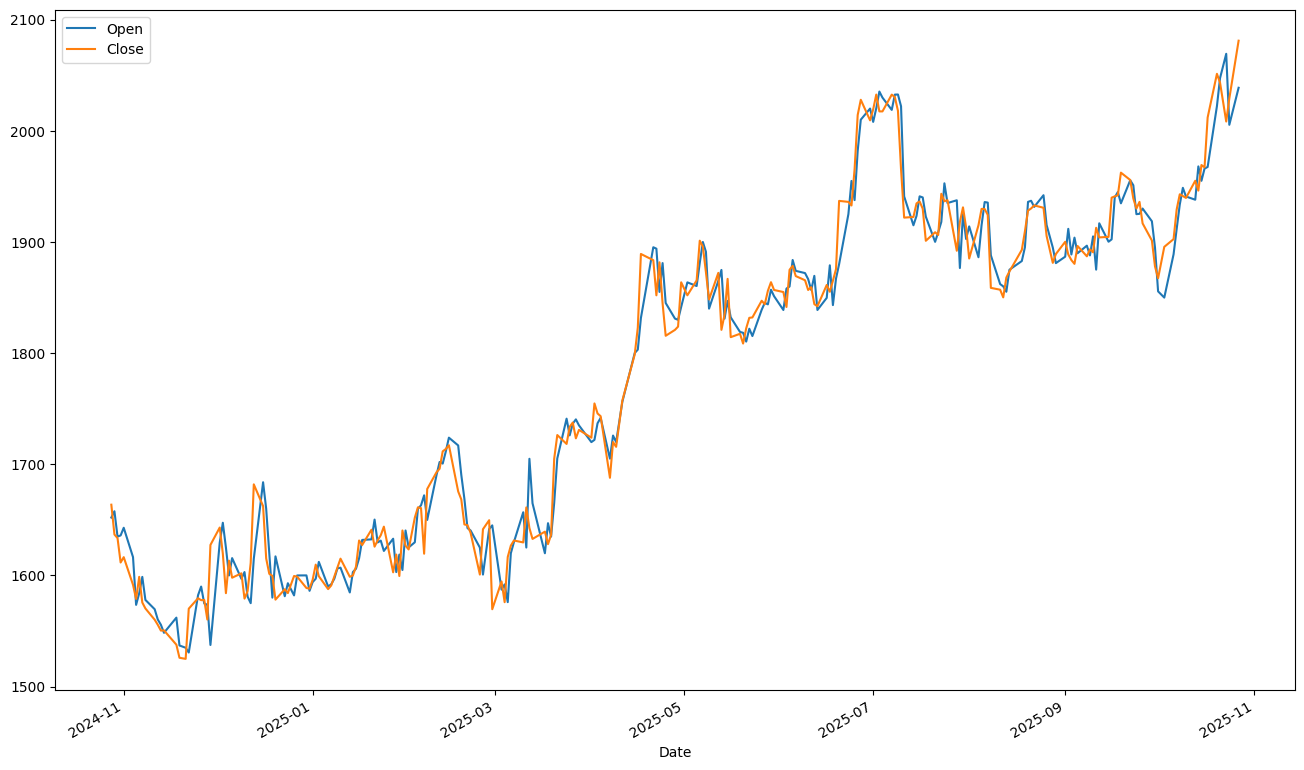

In [8]:
dfBharti.plot(y = ['Open','Close'],figsize = (16,10));

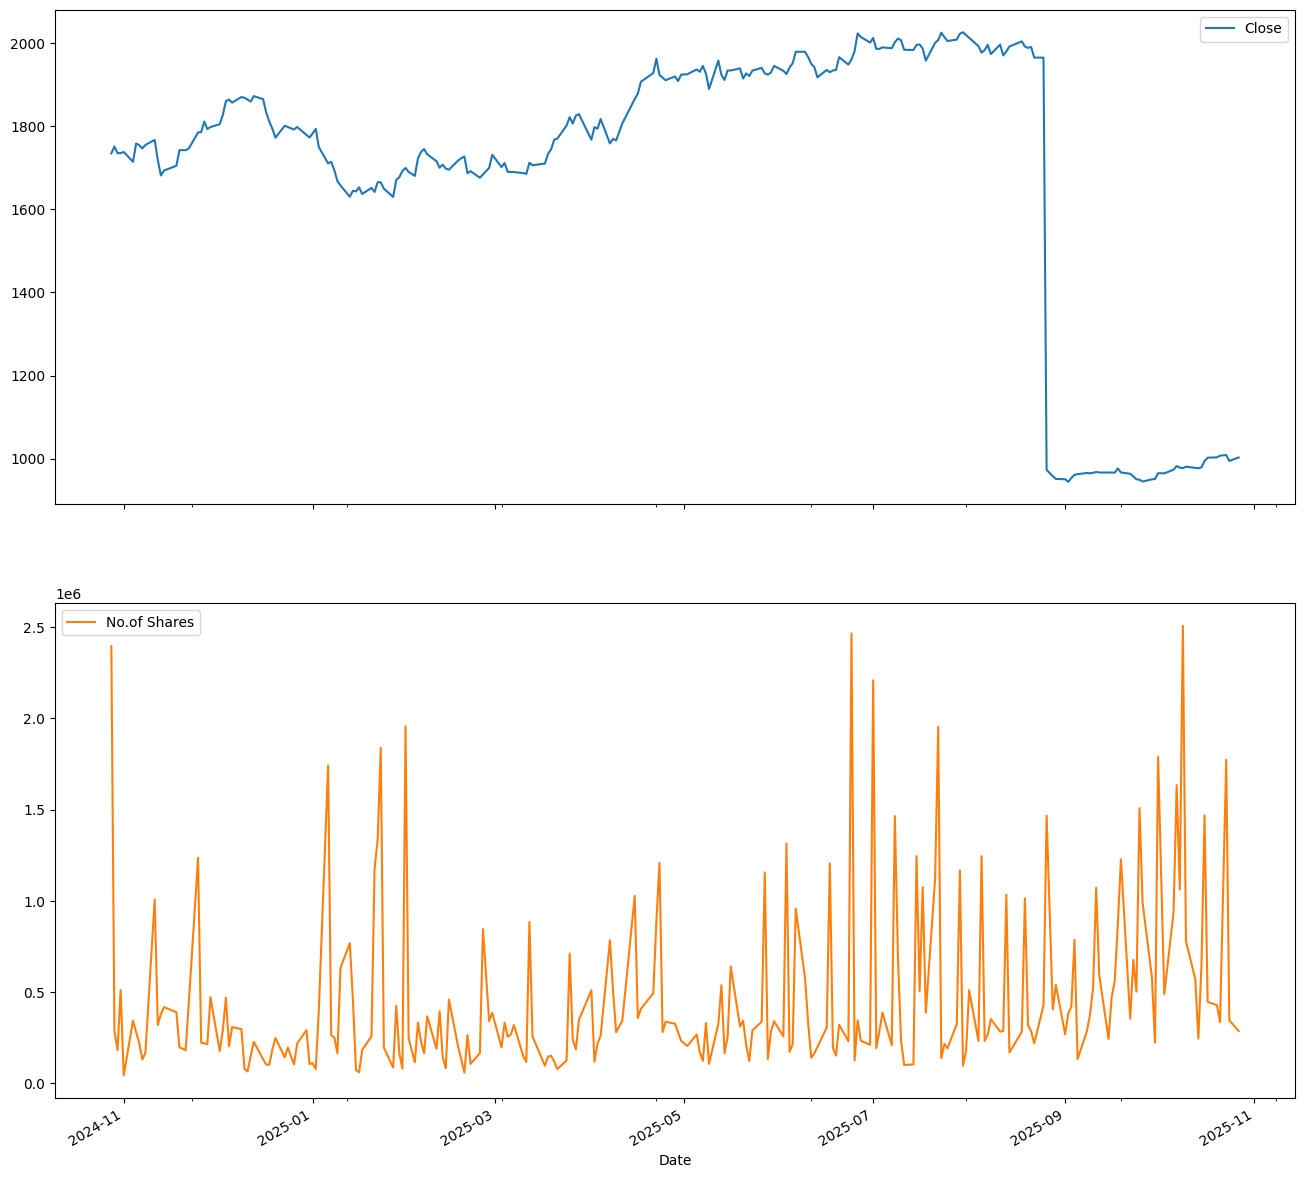

In [9]:
dfhdfc = BSEcsv2df('hdfc.csv')
dfhdfc.plot(y = ['Close','No.of Shares'],figsize = (16,16), subplots=True);

In [10]:
print(list(dfBharti.columns))

['Open', 'High', 'Low', 'Close', 'No.of Shares', 'No. of Trades', 'Turnover']


##Compare Two Companies

In [11]:
dfbharti = BSEcsv2df('bharti.csv')
dfbharti.head(2)

Open     High     Low    Close  No.of Shares  No. of Trades  \
Date                                                                         
2024-10-28  1652.10  1677.40  1645.9  1663.65         42088           4193   
2024-10-29  1657.75  1668.65  1610.0  1636.85        169432           9471   

               Turnover  
Date                     
2024-10-28   69996053.0  
2024-10-29  276532754.0

In [12]:
dfHUL = BSEcsv2df('hulv.csv')
dfHUL.head(2)

Open     High      Low    Close  No.of Shares  No. of Trades  \
Date                                                                          
2024-10-28  2547.95  2589.20  2521.60  2575.25         31665           3009   
2024-10-29  2589.95  2589.95  2536.25  2549.20         54929           2822   

               Turnover  
Date                     
2024-10-28   81125068.0  
2024-10-29  140133044.0

In [13]:
df2Com = pd.merge(dfBharti[['Close']],dfHUL[['Close']],on='Date')
df2Com.head(2)

Close_x  Close_y
Date                        
2024-10-28  1663.65  2575.25
2024-10-29  1636.85  2549.20

In [14]:
df2Com = df2Com.rename(columns ={'Close_x':'ARTL','Close_y':'HUL'})
df2Com.head(2)

ARTL      HUL
Date                        
2024-10-28  1663.65  2575.25
2024-10-29  1636.85  2549.20

In [15]:
startDate = pd.to_datetime(df2Com.index[0]).strftime('%d/%m/%Y')
endDate = pd.to_datetime(df2Com.index[-1]).strftime('%d/%m/%Y')
print(startDate, endDate)

28/10/2024 27/10/2025


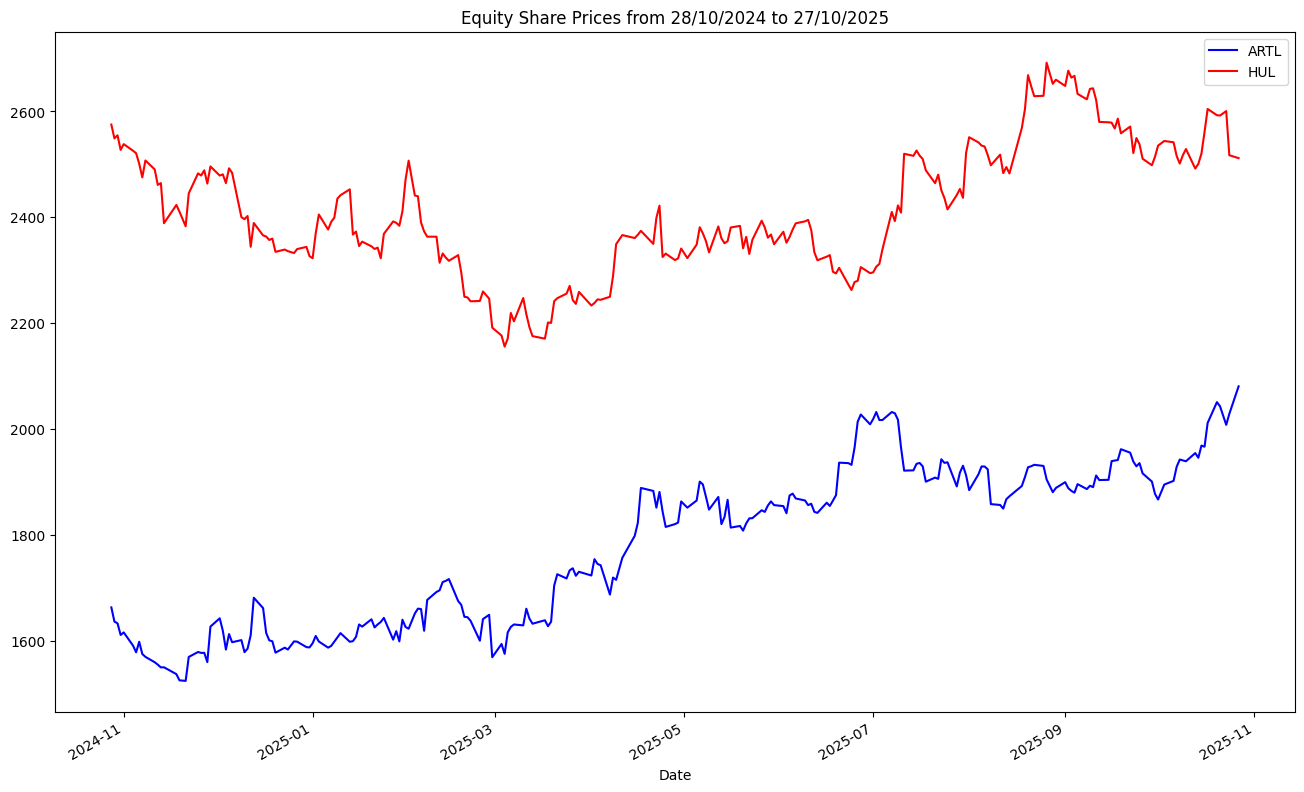

In [17]:
# Plotting directly from DataFrames with Pandas
plotTitle = 'Equity Share Prices from '+ startDate+ ' to '+endDate
df2Com.plot(y =['ARTL', 'HUL'], kind='line', color=['blue','red'], figsize=(16,10), title=plotTitle );



##Compare Three Companies

In [36]:
dfLNTO = BSEcsv2df('lnto.csv')
dfLNTO.head(2)

Open     High      Low   Close  No.of Shares  No. of Trades  \
Date                                                                        
2024-10-28  3326.0  3372.10  3262.95  3340.1         96112          11968   
2024-10-29  3329.8  3384.45  3320.00  3380.9         56204           4682   

               Turnover  
Date                     
2024-10-28  319047873.0  
2024-10-29  188977169.0

In [37]:
df3Com = pd.merge(df2Com[['ARTL','HUL']],dfLNTO[['Close']],on='Date')
df3Com.head(2)

ARTL      HUL   Close
Date                                
2024-10-28  1663.65  2575.25  3340.1
2024-10-29  1636.85  2549.20  3380.9

In [38]:
df3Com = df3Com.rename(columns ={'Close':'L&T'})
df3Com.head(2)

ARTL      HUL     L&T
Date                                
2024-10-28  1663.65  2575.25  3340.1
2024-10-29  1636.85  2549.20  3380.9

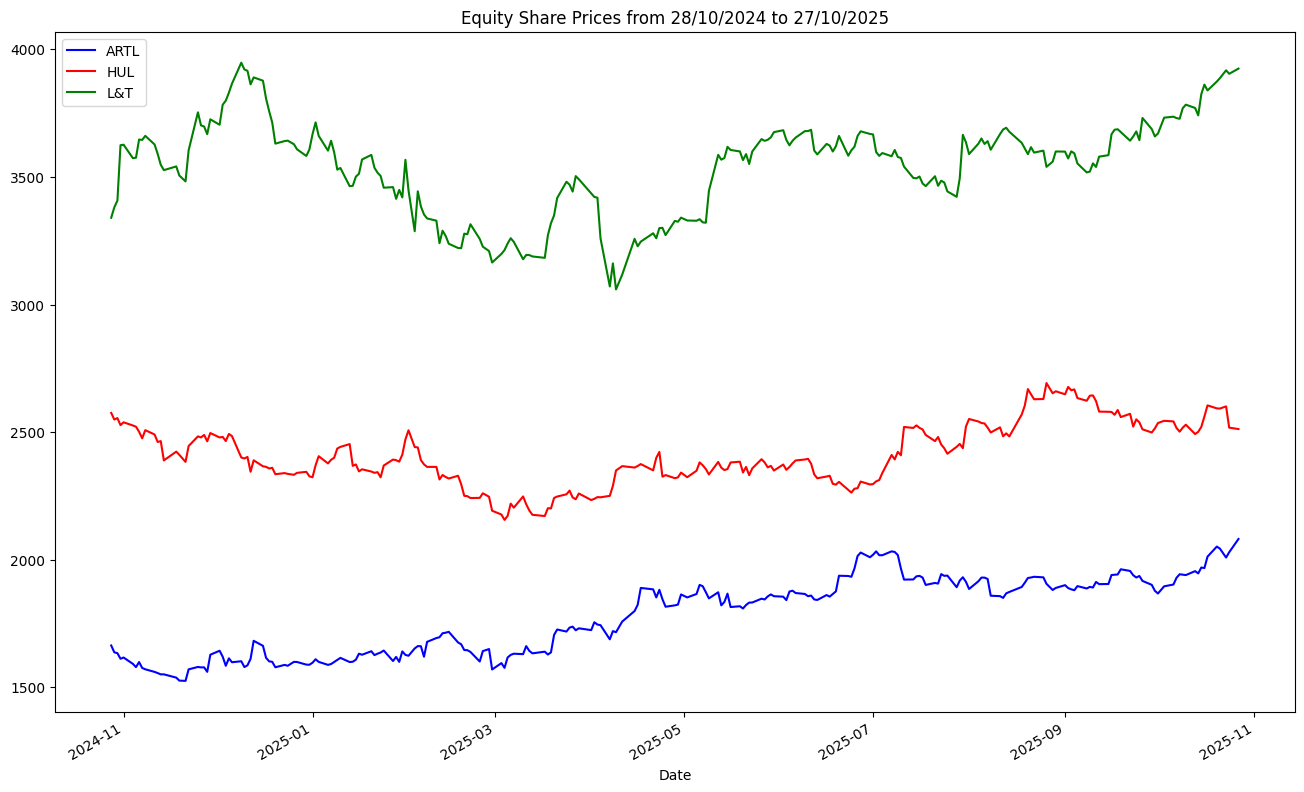

In [39]:
# Plotting directly from DataFrames with Pandas
plotTitle = 'Equity Share Prices from '+ startDate+ ' to '+endDate
df3Com.plot(y=['ARTL', 'HUL', 'L&T'], kind='line', color=['blue','red', 'green'], figsize=(16,10), title=plotTitle);


#Scaling the Data

In [40]:
df = df3Com.copy()
df.head()

ARTL      HUL     L&T
Date                                
2024-10-28  1663.65  2575.25  3340.1
2024-10-29  1636.85  2549.20  3380.9
2024-10-30  1633.60  2554.95  3407.1
2024-10-31  1611.65  2527.50  3624.4
2024-11-01  1616.45  2538.35  3626.3

In [41]:
df['ARTL'] = df['ARTL']/df['ARTL'].iloc[0]
df['HUL'] = df['HUL']/df['HUL'].iloc[0]
df['L&T'] = df['L&T']/df['L&T'].iloc[0]
df.head(10)

ARTL       HUL       L&T
Date                                    
2024-10-28  1.000000  1.000000  1.000000
2024-10-29  0.983891  0.989884  1.012215
2024-10-30  0.981937  0.992117  1.020059
2024-10-31  0.968743  0.981458  1.085117
2024-11-01  0.971629  0.985671  1.085686
2024-11-04  0.956692  0.980837  1.069908
2024-11-05  0.949028  0.979012  1.070447
2024-11-06  0.960989  0.971304  1.091779
2024-11-07  0.947104  0.961305  1.091330
2024-11-08  0.943888  0.973692  1.096120

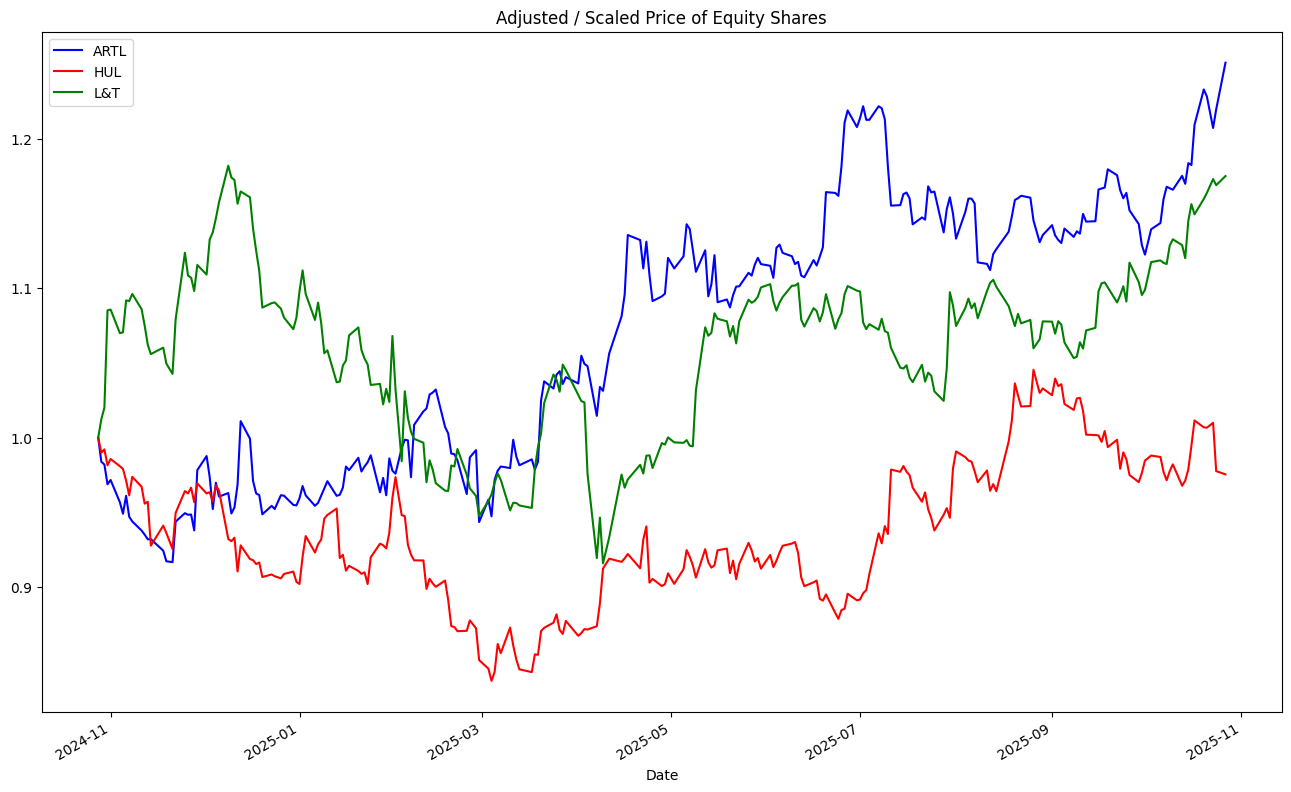

In [43]:
# Plotting directly from DataFrames with Pandas
plotTitle = 'Adjusted / Scaled Price of Equity Shares'
df.plot(y=['ARTL', 'HUL', 'L&T'], kind='line', color=['blue','red', 'green'], figsize=(16,10), title=plotTitle);

#Simple Moving Average

In [44]:
df = BSEcsv2df('bharti.csv')
df.head(2)

Open     High     Low    Close  No.of Shares  No. of Trades  \
Date                                                                         
2024-10-28  1652.10  1677.40  1645.9  1663.65         42088           4193   
2024-10-29  1657.75  1668.65  1610.0  1636.85        169432           9471   

               Turnover  
Date                     
2024-10-28   69996053.0  
2024-10-29  276532754.0

In [45]:
#df.columns
dropCols = ['Turnover', 'No. of Trades']
df.drop(dropCols, axis=1, inplace=True)
df.rename(columns={'No.of Shares':'Volume'}, inplace=True)
df.head(3)

Open     High     Low    Close  Volume
Date                                                 
2024-10-28  1652.10  1677.40  1645.9  1663.65   42088
2024-10-29  1657.75  1668.65  1610.0  1636.85  169432
2024-10-30  1634.95  1651.50  1618.0  1633.60  102780

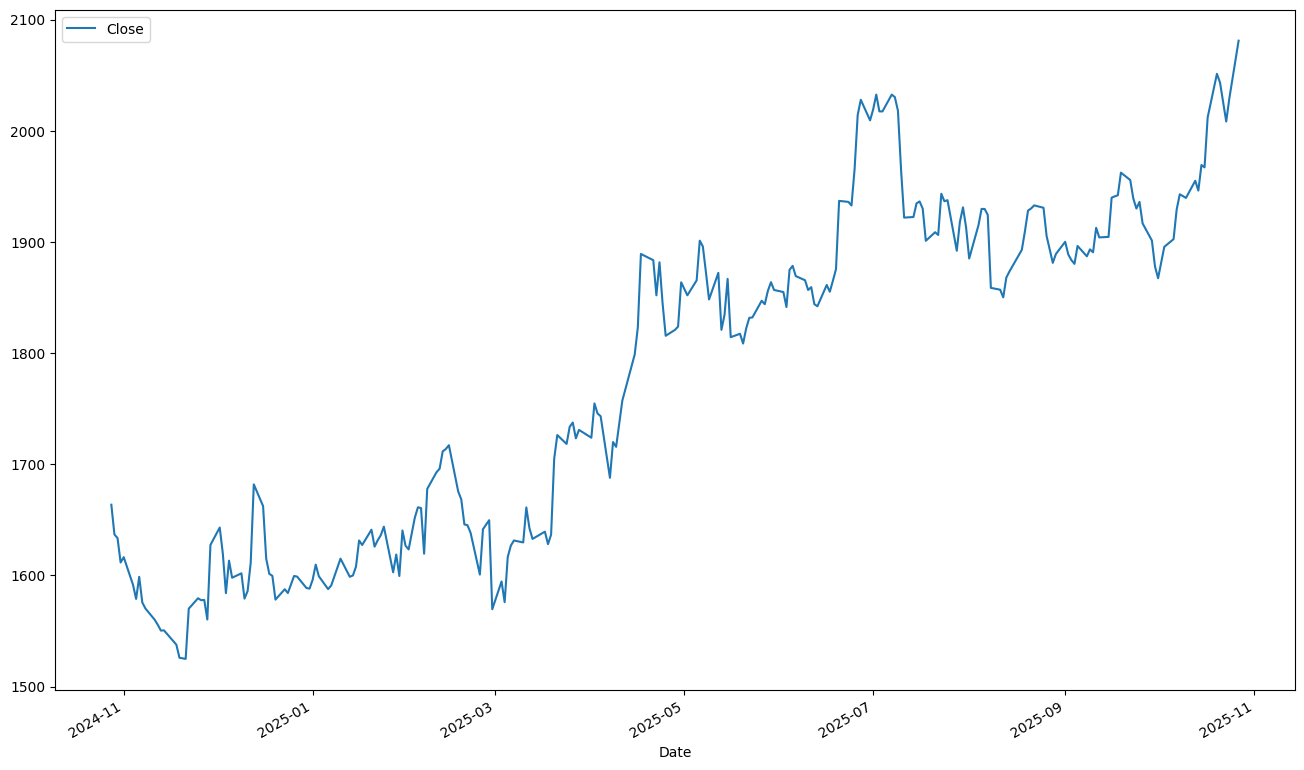

In [46]:
df.plot(y='Close', figsize=(16,10));



In [47]:
df['SMA10'] = df['Close'].rolling(10).mean()
df['SMA30'] = df['Close'].rolling(30).mean()
#df.tail()
#df.head(40)
df.count()

Open      248
High      248
Low       248
Close     248
Volume    248
SMA10     239
SMA30     219
dtype: int64

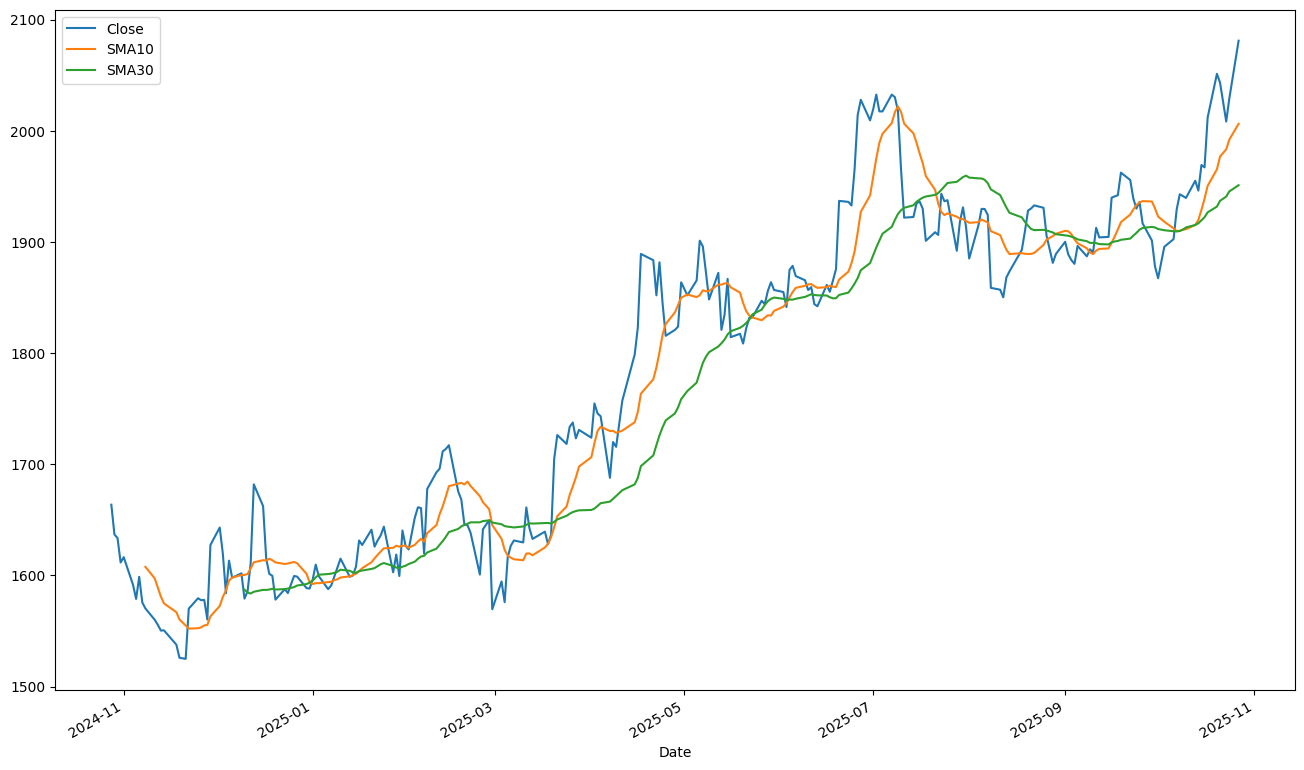

In [48]:
df.plot(y=['Close','SMA10','SMA30'], figsize=(16,10));



#Bollinger Bands
https://www.investopedia.com/terms/b/bollingerbands.asp

In [49]:
df = BSEcsv2df('hulv.csv')[['Open','High','Low','Close', 'No.of Shares']]
df = df.rename(columns ={'No.of Shares':'Volume'})
df.sample(5)

Open     High      Low    Close  Volume
Date                                                  
2025-09-19  2600.05  2605.25  2555.00  2558.85  148084
2025-05-26  2359.10  2397.00  2359.10  2393.75   23017
2025-05-29  2364.05  2375.45  2356.00  2367.70   94160
2025-08-25  2634.20  2641.95  2616.00  2629.60   23035
2025-01-27  2358.55  2408.00  2358.55  2392.40   86795

In [50]:
n = 20                              # smoothing period  30
m = 2                               # number of sigmas
df['TP'] = ((df['High']+df['Low']+df['Close'])/3).round(decimals = 2)
df['MAvg'] = df['TP'].rolling(n).mean().round(decimals = 2)
df['MSig'] = df['TP'].rolling(n).std().round(decimals = 2)
df['bolU'] = df['MAvg'] + m * df['MSig']
df['bolL'] = df['MAvg'] - m * df['MSig']
df.sample(5)

Open     High      Low    Close  Volume       TP     MAvg  \
Date                                                                       
2025-07-16  2526.30  2533.35  2508.25  2516.65   13585  2519.42  2361.26   
2025-06-18  2320.65  2331.40  2286.00  2297.35   53137  2304.92  2358.14   
2025-09-24  2518.15  2575.75  2509.65  2549.85  136187  2545.08  2618.89   
2024-11-25  2455.30  2505.25  2455.30  2483.15  199422  2481.23      NaN   
2025-03-06  2177.00  2229.40  2164.15  2219.55  126319  2204.37  2272.70   

             MSig     bolU     bolL  
Date                                 
2025-07-16  90.82  2542.90  2179.62  
2025-06-18  25.67  2409.48  2306.80  
2025-09-24  48.67  2716.23  2521.55  
2024-11-25    NaN      NaN      NaN  
2025-03-06  68.20  2409.10  2136.30

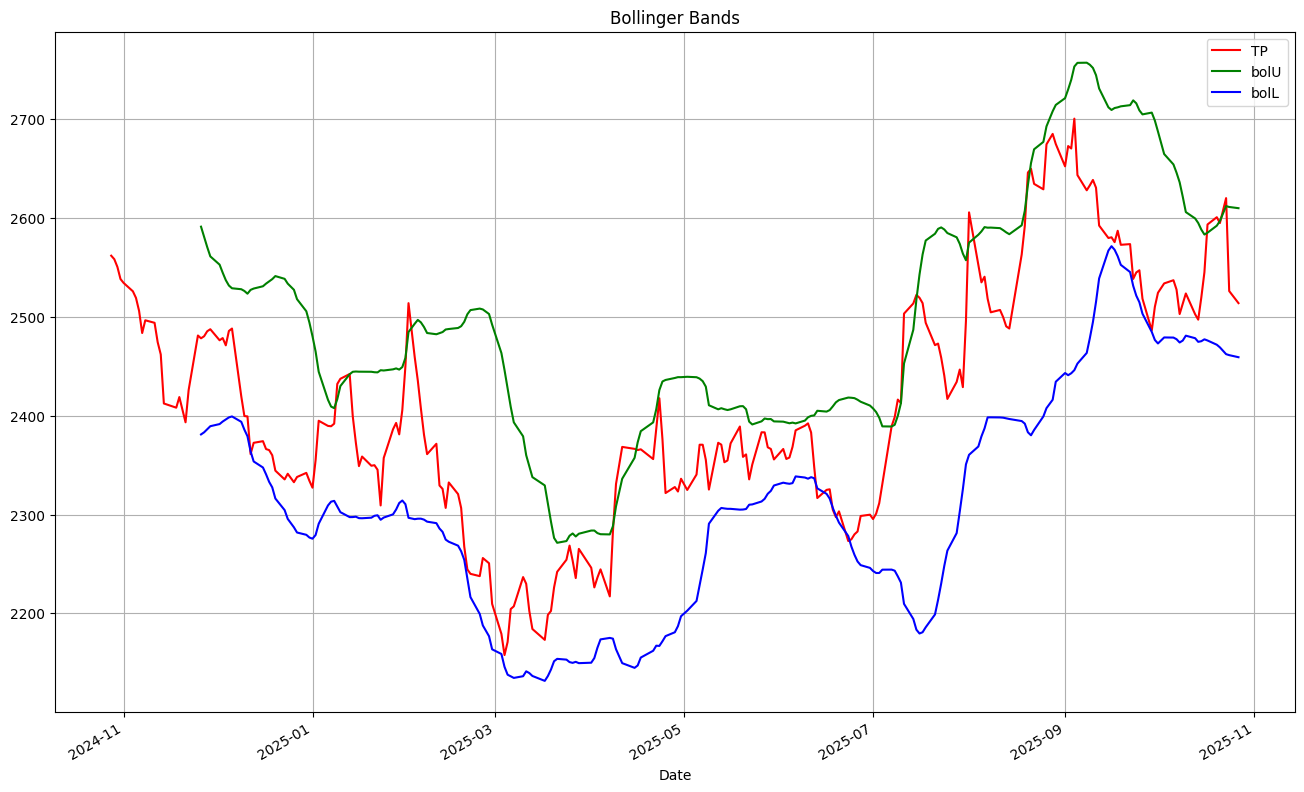

In [51]:
df.plot(y=['TP','bolU','bolL'], figsize = (16,10), color = ['red','green','blue'], grid = True, title = 'Bollinger Bands');

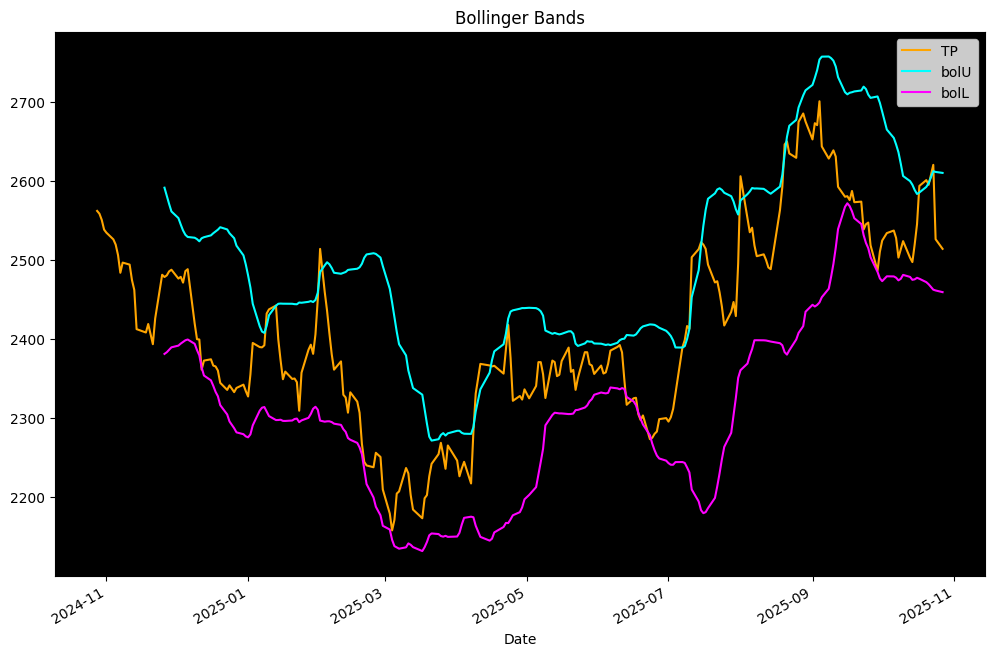

In [52]:
df.plot(y=['TP','bolU','bolL'],\
        figsize = (12,8),\
        color = ['orange','cyan','magenta'],\
        grid = False,\
        title = 'Bollinger Bands').\
        set_facecolor('black');

#Technical Charts

In [53]:
!pip install mplfinance > /dev/null
#
# https://github.com/matplotlib/mplfinance#usage
#
import mplfinance as mpf

In [54]:
df = BSEcsv2df('hulv.csv')
df.head()

Open     High      Low    Close  No.of Shares  No. of Trades  \
Date                                                                          
2024-10-28  2547.95  2589.20  2521.60  2575.25         31665           3009   
2024-10-29  2589.95  2589.95  2536.25  2549.20         54929           2822   
2024-10-30  2550.00  2562.95  2533.95  2554.95         26861           3934   
2024-10-31  2564.55  2564.55  2523.05  2527.50        165308          13866   
2024-11-01  2550.05  2550.05  2515.00  2538.35          5788           1216   

               Turnover  
Date                     
2024-10-28   81125068.0  
2024-10-29  140133044.0  
2024-10-30   68592298.0  
2024-10-31  418376939.0  
2024-11-01   14683973.0

In [55]:
#df.columns
dropCols = ['Turnover', 'No. of Trades']
df.drop(dropCols, axis=1, inplace=True)
df.rename(columns={'No.of Shares':'Volume'}, inplace=True)
df.head(3)

Open     High      Low    Close  Volume
Date                                                  
2024-10-28  2547.95  2589.20  2521.60  2575.25   31665
2024-10-29  2589.95  2589.95  2536.25  2549.20   54929
2024-10-30  2550.00  2562.95  2533.95  2554.95   26861

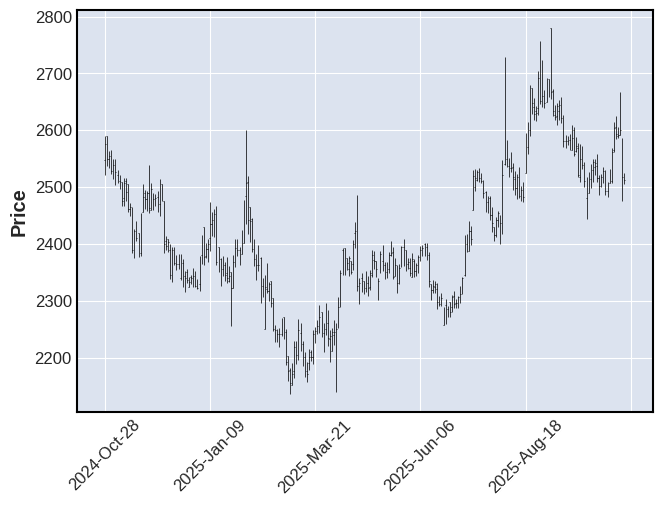

In [56]:
#very basic usage
mpf.plot(df)

In [ ]:
#df.loc['2020-01-01':'2020-12-31']

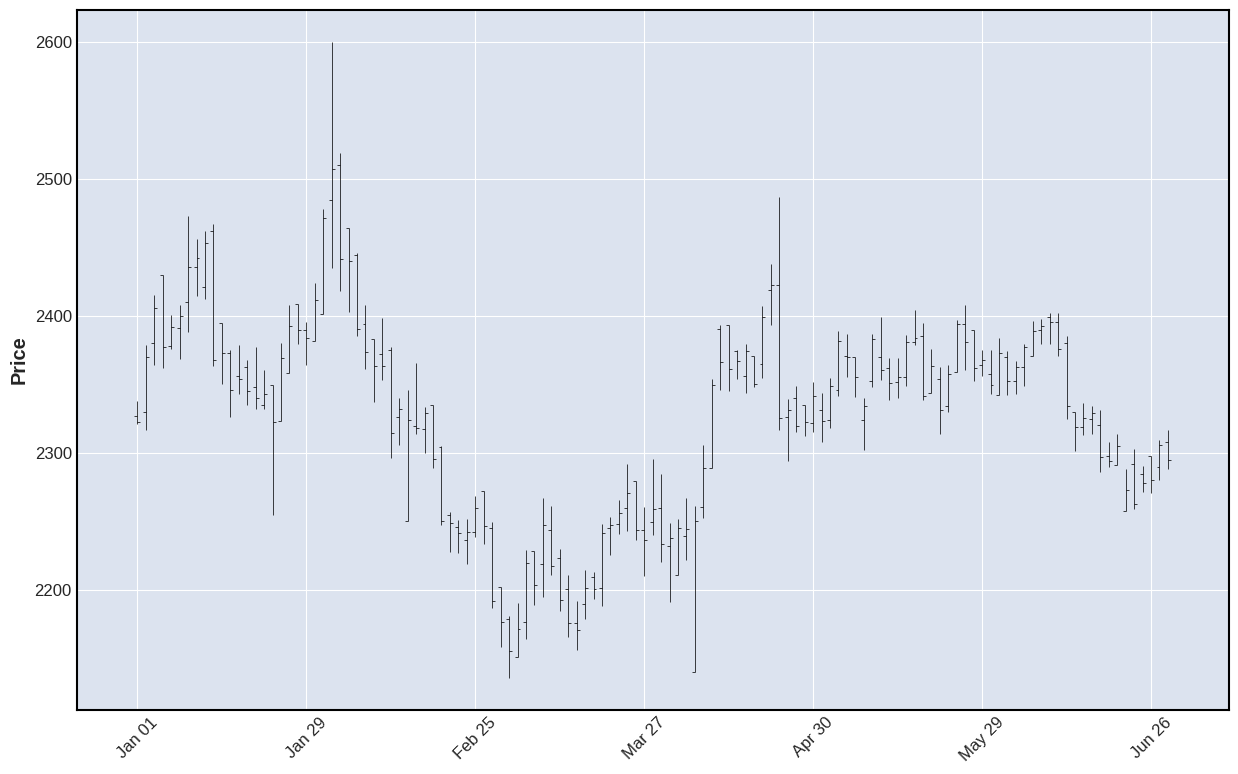

In [58]:
mpf.plot(df.loc['2025-01-01':'2025-06-30'],figsize = (16,10))

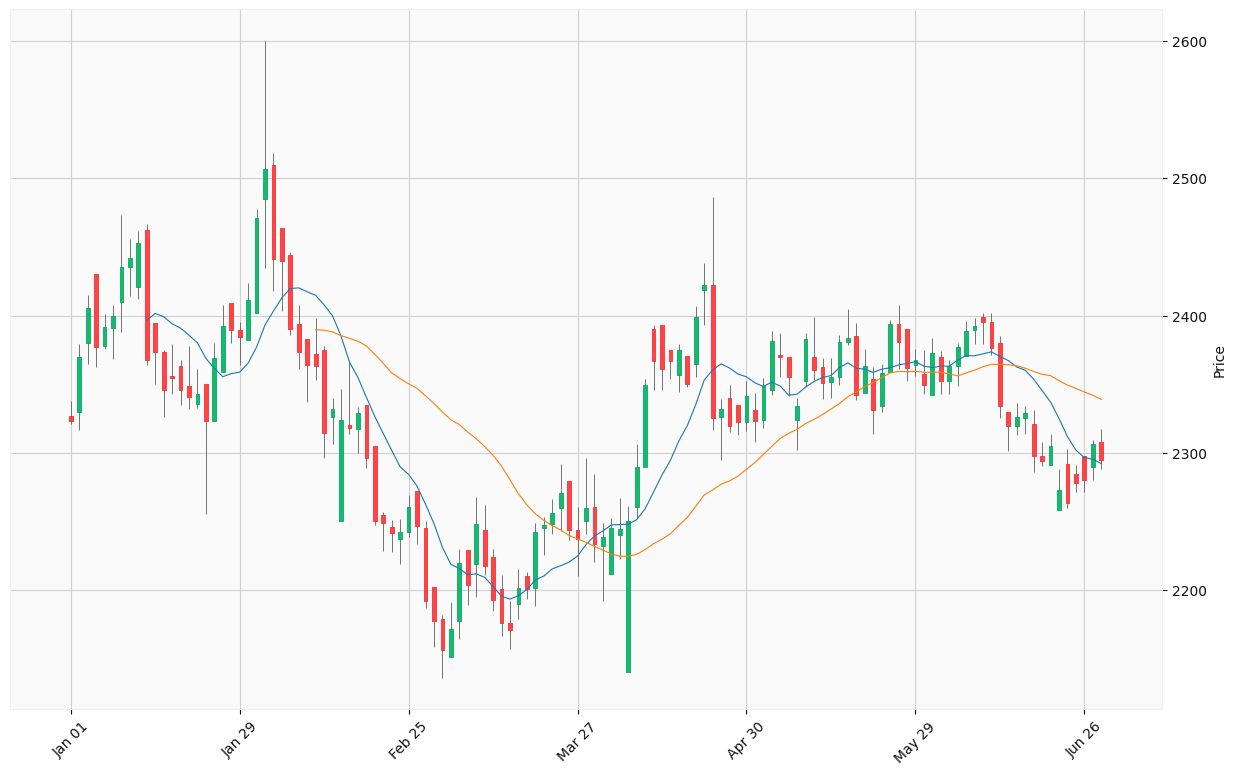

In [59]:
#add moving average and candles
mpf.plot(df.loc['2025-01-01':'2025-06-30'], type='candle',mav=(10,30), style='yahoo', figsize = (16,10))

In [60]:
n = 20                              # smoothing period  30
m = 2                               # number of sigmas
df['TP'] = ((df['High']+df['Low']+df['Close'])/3).round(decimals = 2)
df['MAvg'] = df['TP'].rolling(n).mean().round(decimals = 2)
df['MSig'] = df['TP'].rolling(n).std().round(decimals = 2)
df['bolU'] = df['MAvg'] + m * df['MSig']
df['bolL'] = df['MAvg'] - m * df['MSig']
df.sample(5)

Open     High     Low    Close  Volume       TP     MAvg   MSig  \
Date                                                                            
2025-04-08  2260.5  2306.10  2252.4  2289.35  118104  2282.62  2231.30  28.44   
2025-09-15  2580.3  2591.55  2568.6  2579.60   64057  2579.92  2639.70  36.24   
2025-03-25  2260.0  2291.95  2243.2  2270.70  249719  2268.62  2214.61  31.97   
2024-11-05  2521.0  2529.65  2507.0  2521.20   77774  2519.28      NaN    NaN   
2025-04-16  2374.7  2375.00  2353.7  2367.15   55654  2365.28  2260.19  56.46   

               bolU     bolL  
Date                          
2025-04-08  2288.18  2174.42  
2025-09-15  2712.18  2567.22  
2025-03-25  2278.55  2150.67  
2024-11-05      NaN      NaN  
2025-04-16  2373.11  2147.27

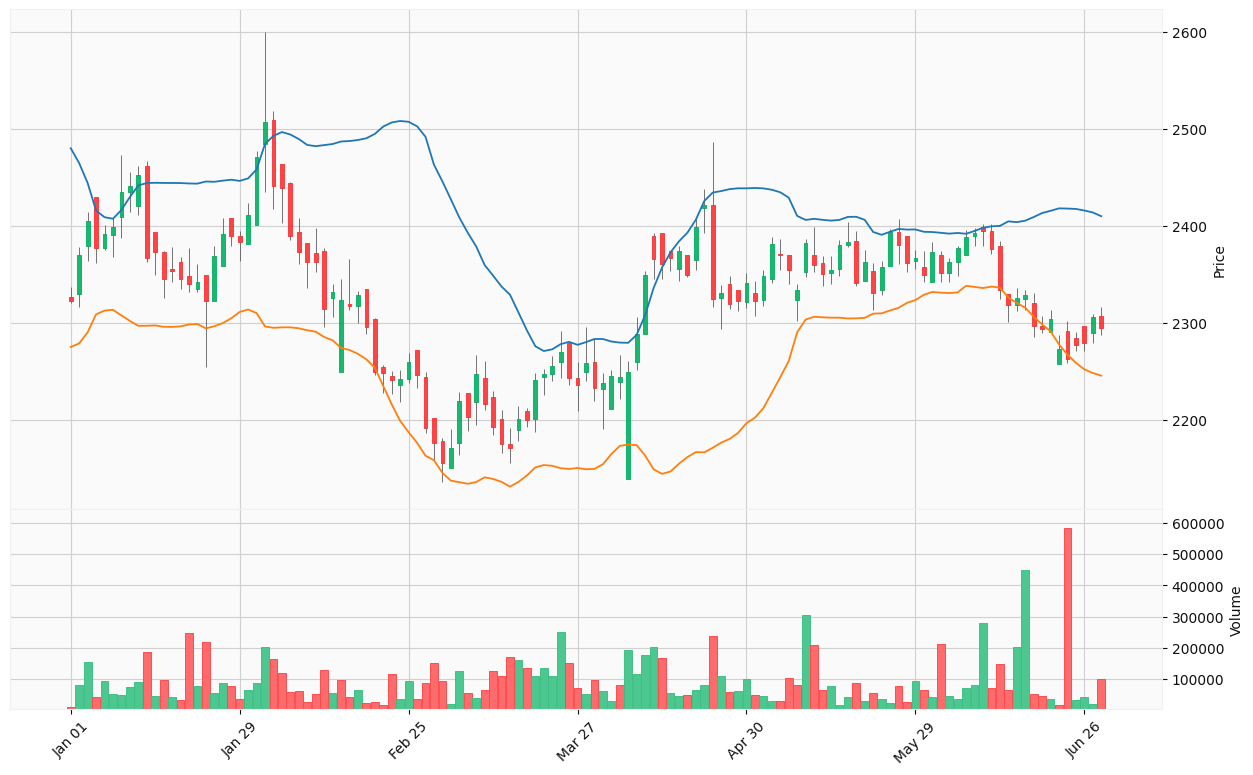

In [62]:
apd = mpf.make_addplot(df.loc['2025-01-01':'2025-06-30'][['bolU', 'bolL']])
mpf.plot(df.loc['2025-01-01':'2025-06-30'], type='candle', addplot=apd, volume=True,style='yahoo', figsize = (16,10))

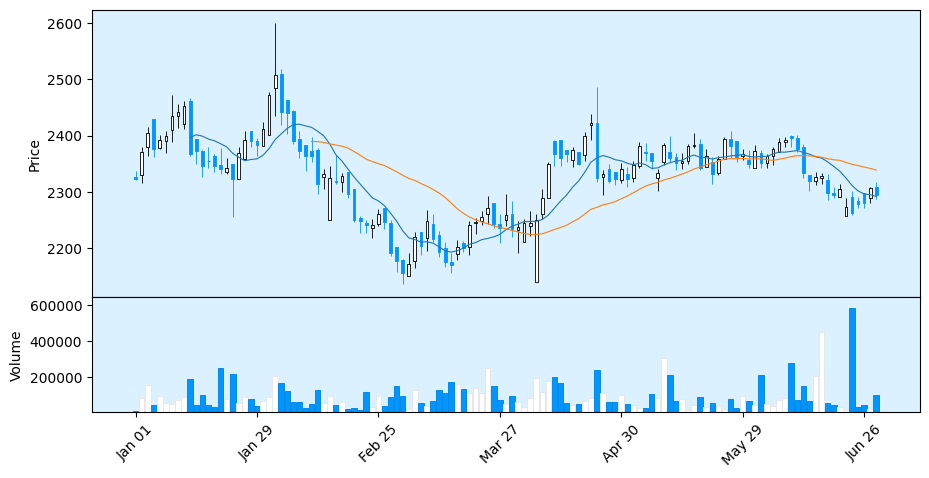

In [63]:
#add volume
mpf.plot(df.loc['2025-01-01':'2025-06-30'], type='candle',mav=(10,30), style='blueskies', volume=True,figratio=(20,10))

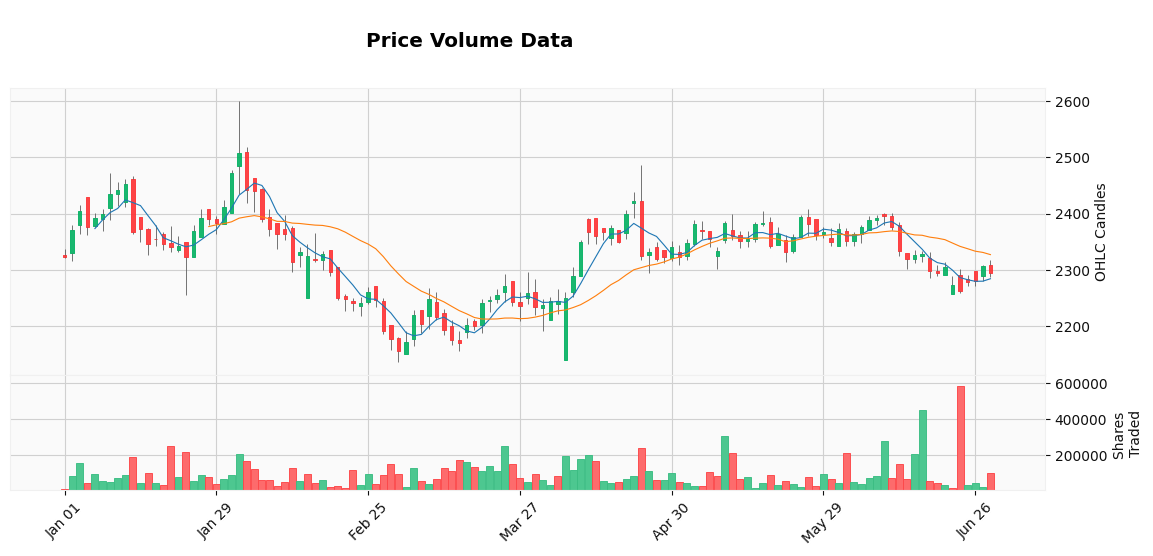

In [65]:
mpf.plot(df.loc['2025-01-01':'2025-06-30'], type='candle',
         style='yahoo',
         mav=(5,20),
         volume=True,
         figratio=(30,12),
         title='\nPrice Volume Data',
         ylabel='OHLC Candles',
         ylabel_lower='Shares \nTraded')

In [66]:
pd.to_datetime('today').strftime('%d %B %Y')

'28 October 2025'

#Exercise
Visit the NSE site https://www1.nseindia.com/products/content/equities/equities/eq_security.htm <br>
or BSE Site BSE Historical Data is available at https://www.bseindia.com/markets/equity/EQReports/StockPrcHistori.html?flag=0 <br>

![alt text](https://github.com/Praxis-QR/FDS/raw/main/images/NSEHistoricData.png)<br>
get the data for three other companies and perform the same analysis

#ChronoTYM <br>
In Indic phraseology, tantra is knowledge, a yantra is a device to explore this knowledge and a mantra is the code that unlocks both the tantra and its yantra. Chrono/TYM a sci-fi trilogy that recreates this framework where the first novel Chronotantra defines the contours of a tech driven, futuristic society, the second, Chronoyantra, describes a device used to explore the genesis of this society, while the third, Chronomantra finally reveals the code, the key, that unlocks this puzzle.  [More information](http://bit.ly/chronobooks) <br>
![alt text](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEjdu_ajYwBRzk5iFYlcs59ZoRMMg6rhNm4JERKspvFJoveJsnfwRlzMICiC37UOja_Bd4sbfLA1pyyBbe0mj3tUfDBXoqCzNUDw3Wux7acoJBaLkWjAvJXfa7drRY2GQRAlFxEY9O7a7raY4RKy7cA3Uxgf5QsaZQ99C9GfXxFSex_rke8ROhAn41t8zOqK/s1640/tymBanner01_3.png)